# Manifold Learning

PCA is flexible, interpretable & fast, however, it does not perform well when there are non-linear relationships in the data. To address this deficiency, manifold learning is used which is a class of unsupervised estimators that seek to describe datasets.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

The goal of a manifold learning estimator is the following -- given high dimensional embedded data, it seeks a low-dimensional representatin f the data that preserves certain relationships wihin the data. In the case of MDS, the quantity preserved is the distance between every pair of points

### MDS

MDS as a manifold learnig method fails when the data embedding is non-linear and goes beyond the set of operations of rotations, translation & scaling of data into higher-dimensional spaces

### Locally Linear Embeddings

While MDS tries to preserve distances between faraway points, LLE only tries to preserve dstances between nearby points

### Difference between PCA & Manifold Learning

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html#Some-Thoughts-on-Manifold-Methods

### Example: Isomap on faces

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

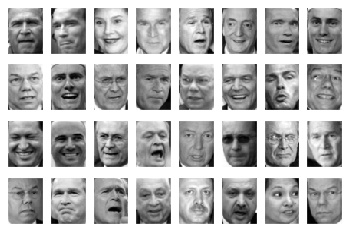

In [23]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

Text(0, 0.5, 'cumulative variance')

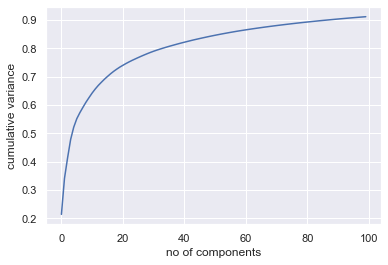

In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components=100, svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative variance')

In [25]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [28]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                   thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.
                                               OffsetImage(images[i], 
                                                          cmap=cmap),
                                                          proj[i])
            ax.add_artist(imagebox)


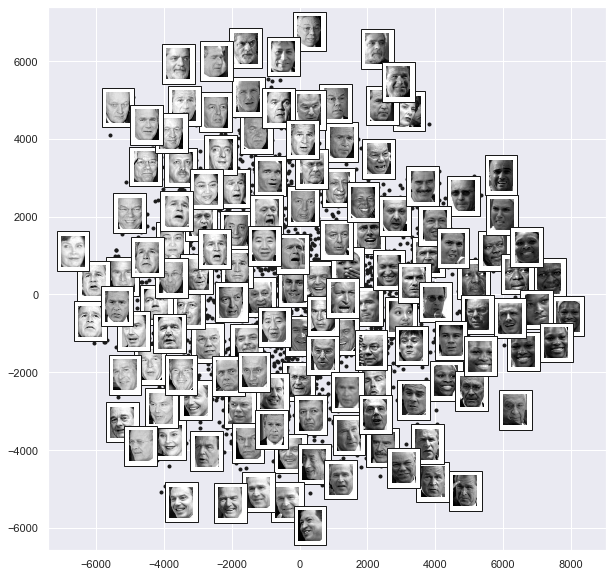

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, 
               model=Isomap(n_components=2),
               images=faces.images[:, ::2, ::2])